# Problem Statement
Loan approval process takes time and cost. The isea was to do it automate using predictive learning 

# Import libraries and data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import os 
from sklearn.preprocessing import Imputer  
import numpy as np 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler  
from sklearn import metrics  
from sklearn.cross_validation import train_test_split  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix,roc_curve, auc, log_loss 
from sklearn.utils import resample 
from sklearn.grid_search import GridSearchCV 
from sklearn.cross_validation import KFold 
#conda install -c anaconda py-xgboost=0.60 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier 

dataset = pd.read_csv('rawdata1.csv') 
dataset.head(5) 
dataset.columns 

C:\Users\suman\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\suman\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# EDA of data

In [2]:
len(dataset.index)#614 rows 
dataset['Loan_Status'].value_counts()#422(not Loan approved) and 192(not approved) 

#total  
#as the data is imbalanced need oversampling but this is giving poor result 
#dataset_majority=dataset[dataset.isFraud==0] 
#dataset_minority=dataset[dataset.isFraud==1] 
#df_minority_upsample=resample(dataset_minority,replace=True,n_samples=6354407,random_state=123)#random state for reproduiable 
#df_upsampled=pd.concat([dataset_majority,df_minority_upsample]) 
#df_upsampled['isFraud'].value_counts()#now its 6354407 and 6354407 
#dataset=df_upsampled 

 
#do bivariant analysis of type payment and fraud(catagory vs catagory) 
dataset['Gender'].value_counts() #489 male 112 female
dataset['Married'].value_counts() #398 married 213 unmarried
dataset['Dependents'].value_counts() #345 0 dependent 102 1 101 2 51 3+
dataset['Education'].value_counts() #480 graduate 134 nongraduate
dataset['Self_Employed'].value_counts() #82 self employed 500 not
dataset['Credit_History'].value_counts() #goor 475 bad 89
dataset['Property_Area'].value_counts() #Semiurban    233 Urban        202 Rural        179
dataset['Education'].value_counts() #480 graduate 134 nongraduate

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

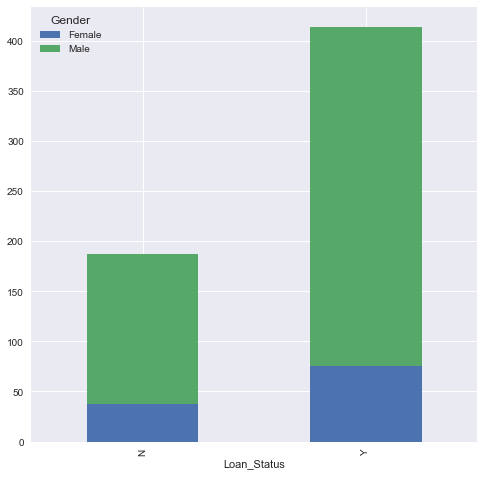

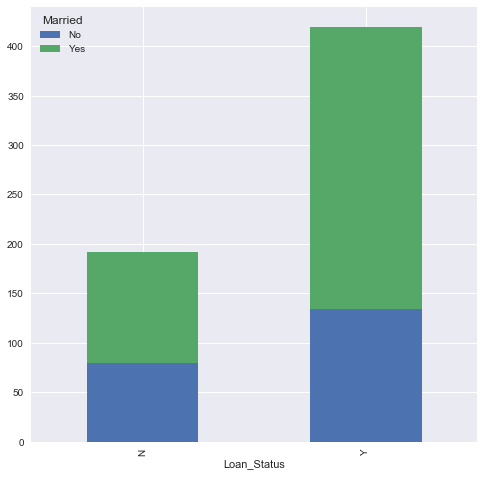

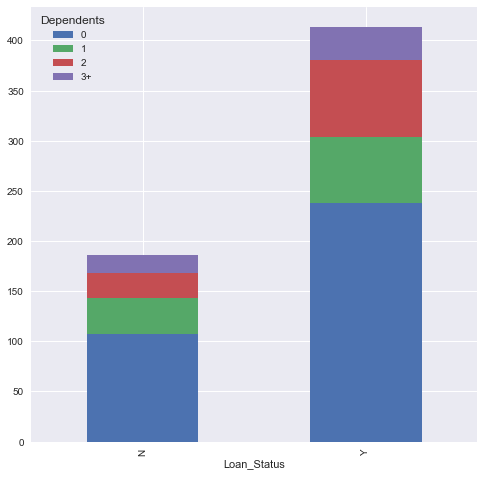

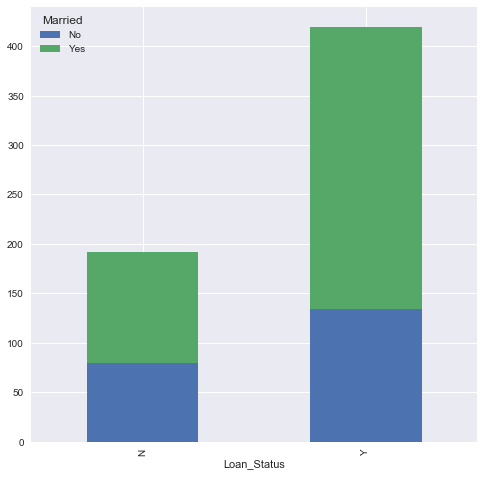

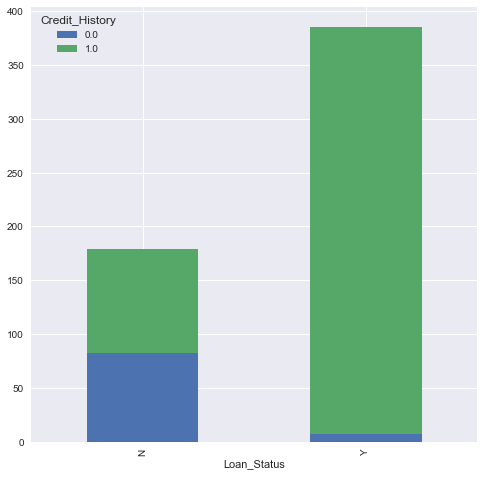

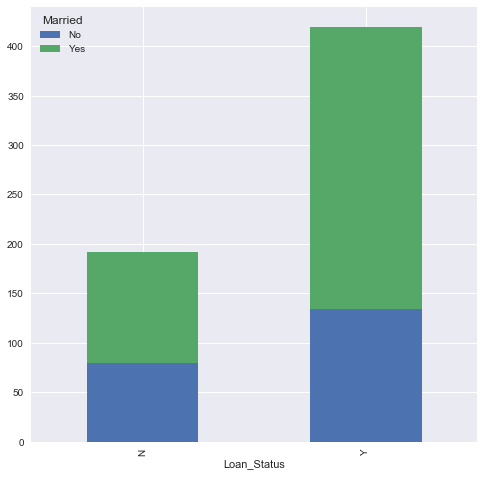

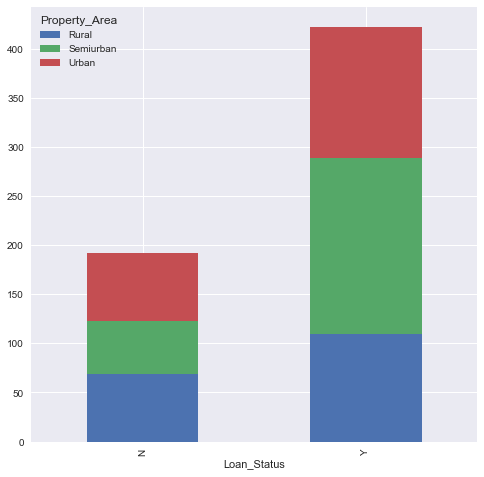

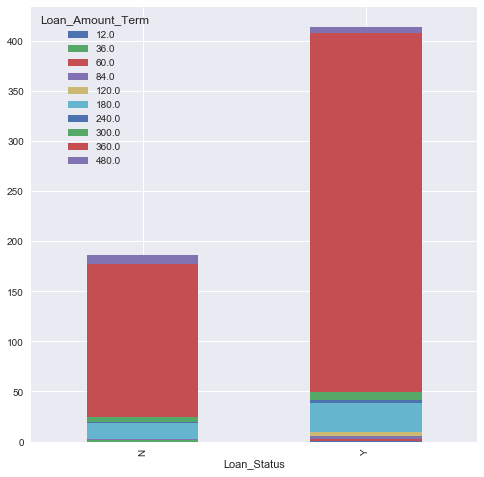

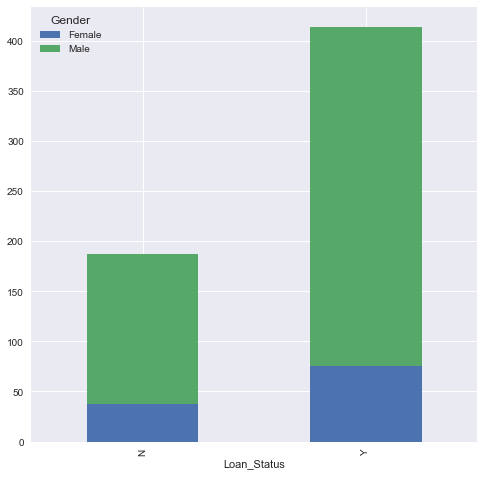

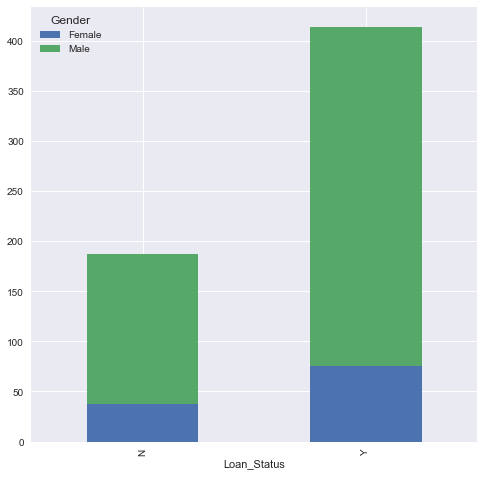

In [5]:
a=pd.crosstab(index=dataset["Loan_Status"],columns=dataset["Gender"])   # 2 way table    
a.plot(kind="bar", figsize=(8,8),  stacked=True)
plt.show()

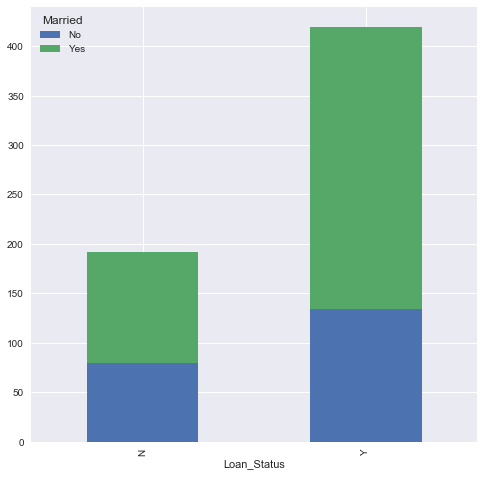

In [6]:

a=pd.crosstab(index=dataset["Loan_Status"],columns=dataset["Married"])   # 2 way table    
a.plot(kind="bar", figsize=(8,8),  stacked=True)
plt.show()

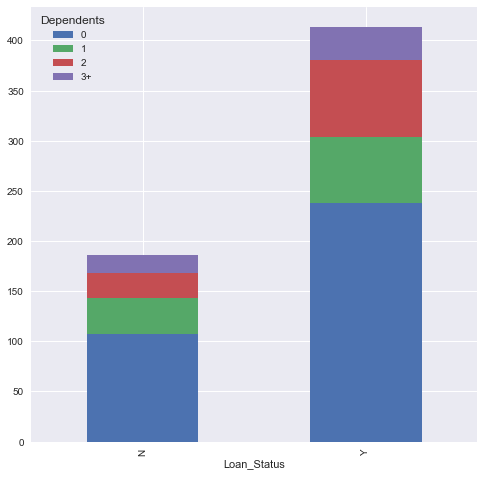

In [7]:

a=pd.crosstab(index=dataset["Loan_Status"],columns=dataset["Dependents"])   # 2 way table    
a.plot(kind="bar", figsize=(8,8),  stacked=True)
plt.show()



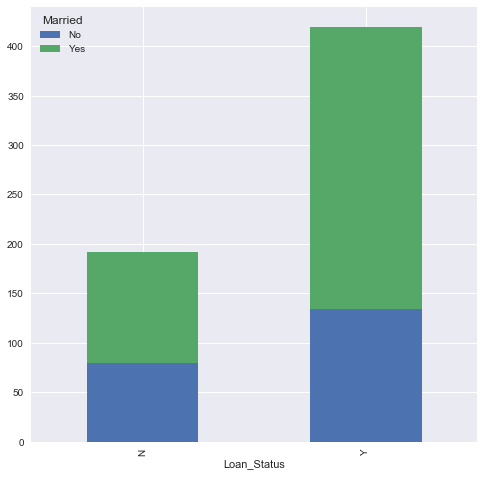

In [8]:
a=pd.crosstab(index=dataset["Loan_Status"],columns=dataset["Married"])   # 2 way table    
a.plot(kind="bar", figsize=(8,8),  stacked=True)
plt.show()


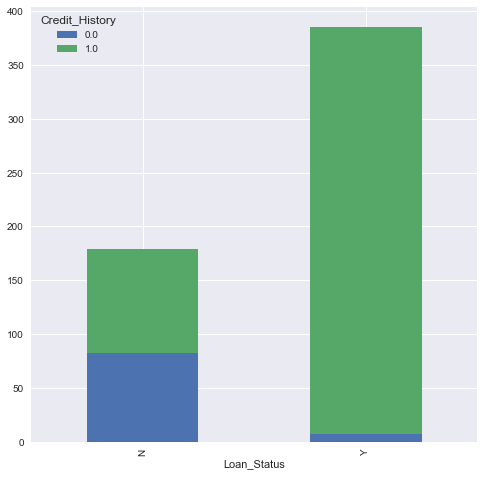

In [9]:

a=pd.crosstab(index=dataset["Loan_Status"],columns=dataset["Credit_History"])   # 2 way table    
a.plot(kind="bar", figsize=(8,8),  stacked=True)
#most of the person with credit_hist=1 got loan approval
plt.show()

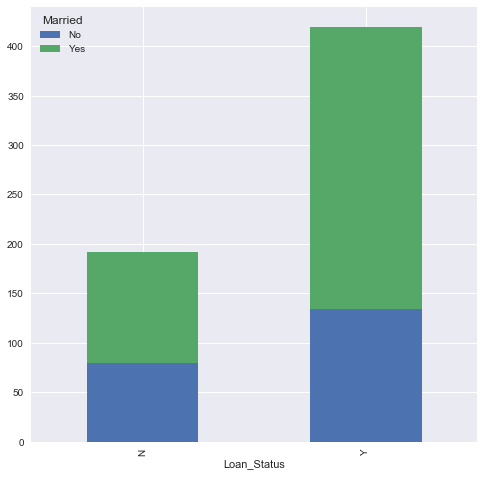

In [10]:


a=pd.crosstab(index=dataset["Loan_Status"],columns=dataset["Married"])   # 2 way table    
a.plot(kind="bar", figsize=(8,8),  stacked=True)
plt.show()

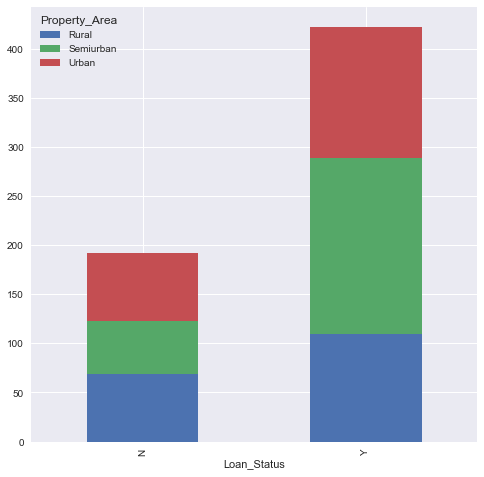

In [11]:

a=pd.crosstab(index=dataset["Loan_Status"],columns=dataset["Property_Area"])   # 2 way table    
a.plot(kind="bar", figsize=(8,8),  stacked=True)
plt.show()

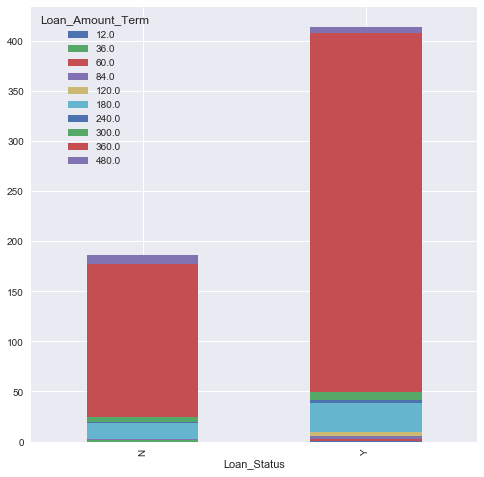

In [12]:

a=pd.crosstab(index=dataset["Loan_Status"],columns=dataset["Loan_Amount_Term"])   # 2 way table    
a.plot(kind="bar", figsize=(8,8),  stacked=True)
plt.show()

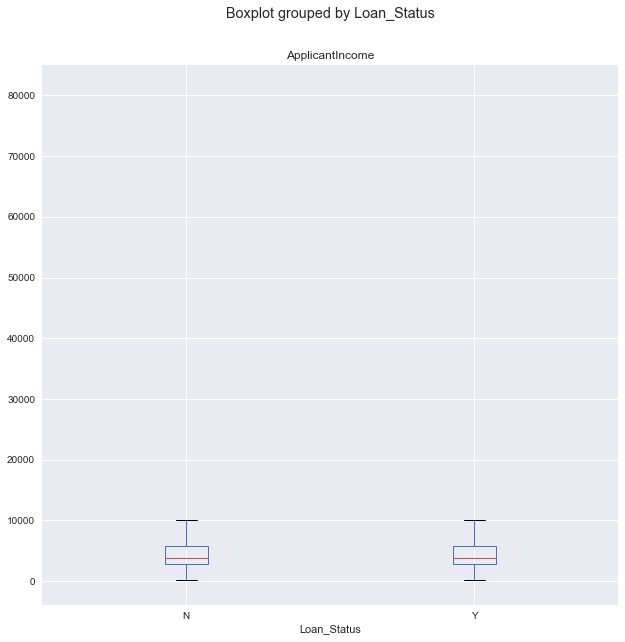

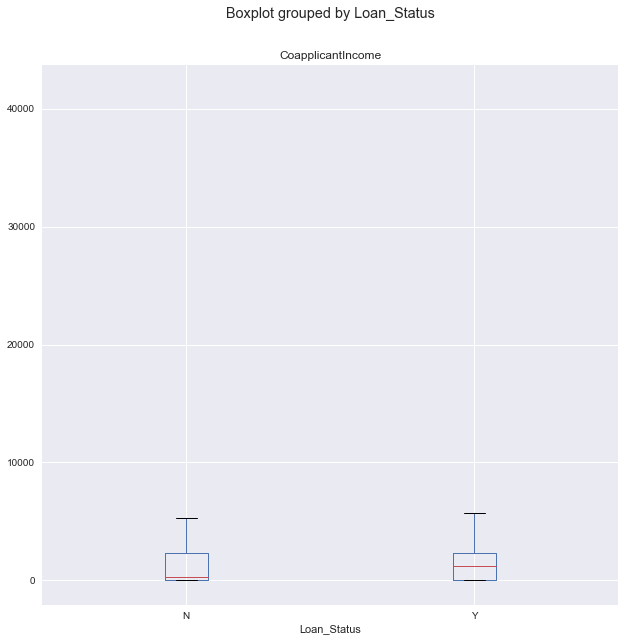

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
#boxplot
fig, ax = plt.subplots(figsize=(10,10)) 
l=['ApplicantIncome'] 
dataset.boxplot(l,'Loan_Status',ax) 
plt.show() 

fig, ax = plt.subplots(figsize=(10,10)) 
l=['CoapplicantIncome'] 
dataset.boxplot(l,'Loan_Status',ax) 
plt.show()

#check datatype
dataset.dtypes



# Data Wrangling

In [14]:
#there is no NaN value so just change one and then impute one 
#find columns with null value  Gender Married Dependents Self_Employed LoanAmount Loan_Amount_Term Credit_History
pd.isnull(dataset).any()
#check no of null value 
dataset[dataset['Gender'].isnull()]
#impute Male if Dependents > 0 else Female
dataset.loc[(dataset['Dependents'] > '0') & (dataset['Gender'].isnull()), 'Gender'] = 'Male'
dataset.loc[(dataset['Dependents'] <= '0') & (dataset['Gender'].isnull()), 'Gender'] = 'Female'

#imputing catagorigal variable canot be done smartly
dataset['Married'].value_counts() #yes is most common
dataset.loc[(dataset['Married'].isnull()), 'Married'] = 'Yes'

dataset['Dependents'].value_counts() #0 is most common
dataset.loc[(dataset['Dependents'].isnull()), 'Dependents'] = '0'


dataset['Education'].value_counts() #Graduate is most common
dataset.loc[(dataset['Education'].isnull()), 'Education'] = 'Yes'

dataset['Self_Employed'].value_counts() #No is most common
dataset.loc[(dataset['Self_Employed'].isnull()), 'Self_Employed'] = 'Yes'


dataset['Credit_History'].value_counts() #1.0 is most common
dataset.loc[(dataset['Credit_History'].isnull()), 'Credit_History'] = '1.0'

dataset_pred=dataset[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area','Loan_Status']] 

#convert catagorigal values in one hot encoder, from numpy its not possible
dataset_pred=pd.get_dummies(dataset_pred, columns=["Dependents"], prefix=["Dependents"])
dataset_pred=pd.get_dummies(dataset_pred, columns=["Education"], prefix=["Education"])
dataset_pred=pd.get_dummies(dataset_pred, columns=["Self_Employed"], prefix=["Self_Employed"])
dataset_pred=pd.get_dummies(dataset_pred, columns=["Property_Area"], prefix=["Property_Area"])
dataset_pred=pd.get_dummies(dataset_pred, columns=["Credit_History"], prefix=["Credit_History"])



In [15]:
X = dataset_pred.loc[:,dataset_pred.columns != 'Loan_Status'].values  
y = dataset_pred.iloc[:, 6].values  
#check numpy naN value
#np.argwhere(np.isnan(X))

#impute LoanAmount with mean
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)  
imputer = imputer.fit(X[:,4:5])  
X[:,4:5] = imputer.transform(X[:,4:5])

#impute LoanAmountTerm with mean
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)  
imputer = imputer.fit(X[:,5:6])  
X[:,5:6] = imputer.transform(X[:,5:6])


 
#use encoder for Gender Married
#here cannot apply onehotencoder for catagorigal
labelencoder_X_1 = LabelEncoder()  
#label encode for Sex
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])  
#lable encode for married
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])  
#lable encoder for Loan_Status
y[:,] = labelencoder_X_1.fit_transform(y[:, ]) #0=N, 1=Y
#convert y from type O to int
y=y.astype('int')



# SPlitting train and test

In [16]:
# splitting train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  
#check traing data spread fraud and nonfraud are equally sprea in train and test 


 
#sc_X = StandardScaler()  
#X_train = sc_X.fit_transform(X_train)  
#X_test = sc_X.transform(X_test)  
#sc_y = StandardScaler()  
#y_train = sc_y.fit_transform(y_train) 



# Model building

In [17]:
grid = { 
         'C': np.power(5.0, np.arange(-5, 5)), 
          'penalty' : ['l2'] # no support of l1 penalty 
         , 'solver': ['liblinear']#'newton-cg', 
    } 
classifier = LogisticRegression(class_weight={0:0.1,1:.9},C=1,random_state = 0)
gs = GridSearchCV(classifier, param_grid=grid, scoring='roc_auc', cv=5) 
#one char value '1.0' is giving problem
gs1=gs.fit(X_train, y_train) 
print ('gs.best_score_:', gs1.best_score_)

#create model using best parameter C=1
classifier = LogisticRegression(class_weight={0:0.9,1:.1},C=1,random_state = 0) 
classifier.fit(X_train, y_train)  


gs.best_score_: 0.5045835758034549


LogisticRegression(C=1, class_weight={0: 0.9, 1: 0.1}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Accuracy check

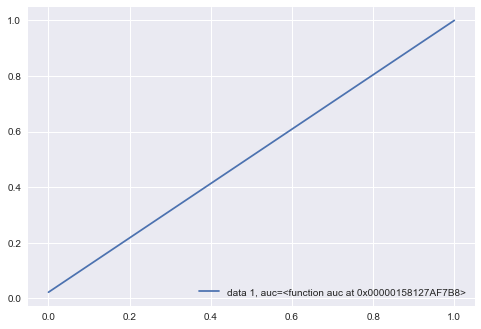

In [18]:
y_pred = classifier.predict(X_test)  
mat=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True) 
#positive is fraud, negative is not fraud 
tp=mat.iloc[1,1] 
tn=mat.iloc[0,0] 
fp=mat.iloc[0,1] 
fn=mat.iloc[1,0] 
precision=tp/(tp+fp) 
recall=tp/(tp+fn) 
fscore=2*precision*recall/(precision+recall) 
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred) 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) 
plt.legend(loc=4) 
plt.show()  
logloss=log_loss(y_test, y_pred) 


#Predicted    0  1  All
#True                  
#0           33  0   33
#1           88  2   90
#All        121  2  123
 


# USe Adaboost

In [19]:
dt = DecisionTreeClassifier()  
clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1) 
#Above I have used decision tree as a base estimator, any ML learner as base estimator   
#100 decision tree are used as week learner 
clf.fit(X_train,y_train) 
#remove unwanted variables 

 
# Predicting the Test set results  
y_pred = clf.predict(X_test)  

 
mat=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True) 
#positive is fraud, negative is not fraud 
tp=mat.iloc[1,1] 
tn=mat.iloc[0,0] 
fp=mat.iloc[0,1] 
fn=mat.iloc[1,0] 
precision=tp/(tp+fp) 
recall=tp/(tp+fn) 
fscore=2*precision*recall/(precision+recall) 
#Predicted   0   1  All
#True                  
#0          20  13   33
#1          18  72   90
#All        38  85  123




# Predict single case

In [21]:

#predict single case
dataset = pd.read_csv('rawdata1.csv')
dataset.loc[(dataset['Dependents'] > '0') & (dataset['Gender'].isnull()), 'Gender'] = 'Male'
dataset.loc[(dataset['Dependents'] <= '0') & (dataset['Gender'].isnull()), 'Gender'] = 'Female'
#imputing catagorigal variable canot be done smartly
dataset['Married'].value_counts() #yes is most common
dataset.loc[(dataset['Married'].isnull()), 'Married'] = 'Yes'
dataset['Dependents'].value_counts() #0 is most common
dataset.loc[(dataset['Dependents'].isnull()), 'Dependents'] = '0'
dataset['Education'].value_counts() #Graduate is most common
dataset.loc[(dataset['Education'].isnull()), 'Education'] = 'Yes'
dataset['Self_Employed'].value_counts() #No is most common
dataset.loc[(dataset['Self_Employed'].isnull()), 'Self_Employed'] = 'Yes'
dataset['Credit_History'].value_counts() #1.0 is most common
dataset.loc[(dataset['Credit_History'].isnull()), 'Credit_History'] = '1.0'
dataset_pred=dataset[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area','Loan_Status']] 
#convert catagorigal values in one hot encoder, from numpy its not possible
dataset_pred=pd.get_dummies(dataset_pred, columns=["Dependents"], prefix=["Dependents"])
dataset_pred=pd.get_dummies(dataset_pred, columns=["Education"], prefix=["Education"])
dataset_pred=pd.get_dummies(dataset_pred, columns=["Self_Employed"], prefix=["Self_Employed"])
dataset_pred=pd.get_dummies(dataset_pred, columns=["Property_Area"], prefix=["Property_Area"])
dataset_pred=pd.get_dummies(dataset_pred, columns=["Credit_History"], prefix=["Credit_History"])
X = dataset_pred.loc[:,dataset_pred.columns != 'Loan_Status'].values  
y = dataset_pred.iloc[:, 6].values  
#check numpy naN value
#np.argwhere(np.isnan(X))
#impute LoanAmount with mean
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)  
imputer = imputer.fit(X[:,4:5])  
X[:,4:5] = imputer.transform(X[:,4:5])
#impute LoanAmountTerm with mean
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)  
imputer = imputer.fit(X[:,5:6])  
X[:,5:6] = imputer.transform(X[:,5:6])

#use encoder for Gender Married
#here cannot apply onehotencoder for catagorigal
labelencoder_X_1 = LabelEncoder()  
#label encode for Sex
X[:, 0] = labelencoder_X_1.fit_transform(X[:, 0])  
#lable encode for married
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])  
#lable encoder for Loan_Status
y[:,] = labelencoder_X_1.fit_transform(y[:, ]) #0=N, 1=Y
#convert y from type O to int
y=y.astype('int')
y_pred = clf.predict(X)  
 